# Notebook with Minimal example to run hposuite

In [2]:
# It is assumed that the datadir is hposuite/data

from lib.benchmarks import BENCHMARKS
from lib.optimizers import OPTIMIZERS

print(BENCHMARKS.keys())
print(OPTIMIZERS.keys())

dict_keys(['Ex_Functional_Bench', 'Ex_Surrogate_Bench', 'mfh3_bad', 'mfh6_bad', 'mfh3_good', 'mfh6_good', 'mfh3_moderate', 'mfh6_moderate', 'mfh3_terrible', 'mfh6_terrible'])
dict_keys(['RandomSearch', 'RandomSearchWithPriors', 'Ex_MO_Opt', 'Ex_Multifidelity_Opt', 'Ex_Blackbox_Opt'])


## Running Random Search on a Functional Benchmark (eg: ACKLEY)

In [27]:
func_benchmark = BENCHMARKS["Ex_Functional_Bench"]
rs = OPTIMIZERS["RandomSearch"]

### Printing Ackley's description

In [28]:
print(func_benchmark.desc)

BenchmarkDescription(name='Ex_Functional_Bench', config_space=Configuration space object:
  Hyperparameters:
    x0, Type: UniformFloat, Range: [-32.768, 32.768], Default: 0.0
    x1, Type: UniformFloat, Range: [-32.768, 32.768], Default: 0.0
, load=functools.partial(<bound method FunctionalBenchmark.load of <hpoglue.benchmark.FunctionalBenchmark object at 0x78df76de4040>>), metrics={'y': Measure(minimize=True, kind=<Kind.METRIC: 'metric'>, bounds=(0.0, inf))}, test_metrics=None, costs=None, fidelities=None, has_conditionals=False, is_tabular=False, env=Env(name='empty'), mem_req_mb=1024, predefined_points={'min': Config(config_id='min', values={'x0': 0.0, 'x1': 0.0}, description='This point yields a global optimum of y:0.0')}, extra={})


### Run RandomSearch on Ackley using hposuite

In [29]:
from hposuite import create_study

study = create_study(
    name="hposuite_demo_rs_func",
    output_dir="example-outputs",
    optimizers=rs,
    benchmarks=func_benchmark,
    num_seeds=5,
    budget=100,
)

study.optimize(overwrite=True)

INFO:hposuite.study:Generated 5 runs
INFO:hposuite.study:Created study at example-outputs/hposuite_demo_rs_func
INFO:hposuite.study:Dumped experiments to example-outputs/hposuite_demo_rs_func/dump_all.txt
INFO:hposuite.study:Overwrite flag is set to True. Existing results will be overwritten!
INFO:hposuite.study:Running 5 experiments sequentially
INFO:hposuite.study:Running experiment 1/5
INFO:hposuite.run:Overwriting optimizer=RandomSearch.benchmark=Ex_Functional_Bench.TrialBudget=100.seed=383329928 in `state=<State.PENDING: 'PENDING'>` at /home/soham/repos/hposuite/examples/example-outputs/hposuite_demo_rs_func/optimizer=RandomSearch.benchmark=Ex_Functional_Bench.TrialBudget=100.seed=383329928.
INFO:hpoglue._run:COMPLETED running optimizer=RandomSearch.benchmark=Ex_Functional_Bench.TrialBudget=100.seed=383329928
INFO:hposuite.run:Results dumped at /home/soham/repos/hposuite/examples/example-outputs/hposuite_demo_rs_func/optimizer=RandomSearch.benchmark=Ex_Functional_Bench.TrialBudget

## Running a BlackBox Optimizer on a Synthetic Benchmark

SMAC provides the BlackBoxFacade which is used as an example of a BlackBox Optimizer. \
Multi-fidelity Hartmann 3D with the correlation "good" serves as an example of a Synethetic Multi-fidelity Benchmark.

In [30]:
bb_optimizer = OPTIMIZERS["Ex_Blackbox_Opt"]
mf_syn_benchmark = BENCHMARKS["mfh3_good"]

In [32]:
from hposuite import create_study

study = create_study(
    name="hposuite_demo_bb_mfsyn",
    output_dir="example-outputs",
    optimizers=bb_optimizer,
    benchmarks=mf_syn_benchmark,
    num_seeds=5,
    budget=20,
)

study.optimize(overwrite=True)

INFO:hposuite.study:Generated 5 runs
INFO:hposuite.study:Created study at example-outputs/hposuite_demo_bb_mfsyn
INFO:hposuite.study:Dumped experiments to example-outputs/hposuite_demo_bb_mfsyn/dump_all.txt
INFO:hposuite.study:Overwrite flag is set to True. Existing results will be overwritten!
INFO:hposuite.study:Running 5 experiments sequentially
INFO:hposuite.study:Running experiment 1/5
INFO:hposuite.run:Overwriting optimizer=Ex_Blackbox_Opt.benchmark=mfh3_good.TrialBudget=20.seed=383329928 in `state=<State.RUNNING: 'RUNNING'>` at /home/soham/repos/hposuite/examples/example-outputs/hposuite_demo_bb_mfsyn/optimizer=Ex_Blackbox_Opt.benchmark=mfh3_good.TrialBudget=20.seed=383329928.
INFO:hpoglue._run:COMPLETED running optimizer=Ex_Blackbox_Opt.benchmark=mfh3_good.TrialBudget=20.seed=383329928
INFO:hposuite.run:Results dumped at /home/soham/repos/hposuite/examples/example-outputs/hposuite_demo_bb_mfsyn/optimizer=Ex_Blackbox_Opt.benchmark=mfh3_good.TrialBudget=20.seed=383329928/optimize

## Running a MultiFidelity Optimizer on a Surrogate Benchmark

We use a Multi-fidelity Optimizer like Hyperband from SMAC on the PD1 Cifar 100 Wide Resnet 2048 Benchmark which is a Surrogate Benchmark provided by the MF-Prior-Bench Package

In [3]:
sg_benchmark = BENCHMARKS["Ex_Surrogate_Bench"]
mf_optimizer = OPTIMIZERS["Ex_Multifidelity_Opt"]

In [ ]:
from hposuite import create_study

study = create_study(
    name="hposuite_demo_sg_mf",
    output_dir="example-outputs",
    optimizers=mf_optimizer,
    benchmarks=sg_benchmark,
    num_seeds=5,
    budget=100,
)

study.optimize(overwrite=True)

## Running a Multi-objective Optimizer on a Benchmark with Multiple Objectives

Optuna's NSGA2 Sampler is used here as an example of a Multi-Objective Optimizer. \
PD1 Cifar 100 Wide Resnet 2048 from MF-Prior-Bench is the Benchmark used with "valid_error_rate" and "train_cost" as the objectives.

In [3]:
mo_optimizer = OPTIMIZERS["Ex_MO_Opt"]
mo_benchmark = BENCHMARKS["Ex_Surrogate_Bench"]

### Printing the description of the Example Surrogate benchmark and its available list of objectives

In [6]:
print(mo_benchmark)
print(mo_benchmark.metrics.keys(), mo_benchmark.costs.keys()) # We can use both the metrics and costs as objectives

BenchmarkDescription(name='Ex_Surrogate_Bench', config_space=Configuration space object:
  Hyperparameters:
    lr_decay_factor, Type: UniformFloat, Range: [0.010093, 0.989012], Default: 0.4995525
    lr_initial, Type: UniformFloat, Range: [1e-05, 9.779176], Default: 0.0098889716351, on log-scale
    lr_power, Type: UniformFloat, Range: [0.100708, 1.999376], Default: 1.050042
    opt_momentum, Type: UniformFloat, Range: [5.9e-05, 0.998993], Default: 0.0076772773169, on log-scale
, load=functools.partial(<function _get_surrogate_benchmark at 0x7c6b22e15240>, benchmark_name='cifar100_wideresnet_2048', datadir=PosixPath('/home/soham/repos/hposuite/data/pd1')), metrics={'valid_error_rate': Measure(minimize=True, kind=<Kind.METRIC: 'metric'>, bounds=(0, 1))}, test_metrics=None, costs={'train_cost': Measure(minimize=True, kind=<Kind.COST: 'cost'>, bounds=(0, inf))}, fidelities={'epoch': RangeFidelity(kind=<class 'int'>, min=1, max=199, stepsize=1, supports_continuation=True)}, has_conditiona

### Running Optuna NSGA2 on the Surrogate Benchmark

In [ ]:
from hposuite import create_study

study = create_study(
    name="hposuite_demo_sg_mf",
    output_dir="../../hposuite-output",
    optimizers=mo_optimizer,
    benchmarks=(
        mo_benchmark,
        {
            "objectives": ["valid_error_rate", "train_cost"]
        }
    ),
    num_seeds=5,
    budget=100,
)

study.optimize(overwrite=True)

## Running an Optimizer that supports Priors on a Benchmark with a Prior over its objective

Optimizer: RandomSearch With Priors \
Benchmark: Ackley Functional Benchmark with the optimum as the Prior (perturbed by std=0.25)

In [4]:
rs_with_priors = OPTIMIZERS["RandomSearchWithPriors"]
func_benchmark = BENCHMARKS["Ex_Functional_Bench"]

### Print available predefined points in the Ackley Functional Benchmark

In [26]:
print(func_benchmark.desc.predefined_points)

{'min': Config(config_id='min', values={'x0': 0.0, 'x1': 0.0}, description='This point yields a global optimum of y:0.0')}


### Run RandomSearch With Priors on Ackley with hposuite

In [13]:
from hposuite import create_study

study = create_study(
    name="hposuite_demo_priors",
    output_dir="example-outputs",
    optimizers=rs_with_priors,
    benchmarks=(
        func_benchmark,
        {
            "priors": {
                "y": func_benchmark.desc.predefined_points["min"]
            }
        }
    ),
    num_seeds=5,
    budget=100,
)

study.optimize(overwrite=True)

INFO:hposuite.study:Generated 5 runs
INFO:hposuite.study:Created study at example-outputs/hposuite_demo_priors
INFO:hposuite.study:Dumped experiments to example-outputs/hposuite_demo_priors/dump_all.txt
INFO:hposuite.study:Overwrite flag is set to True. Existing results will be overwritten!
INFO:hposuite.study:Running 5 experiments sequentially
INFO:hposuite.study:Running experiment 1/5
INFO:hposuite.run:Overwriting optimizer=RandomSearchWithPriors.benchmark=Ex_Functional_Bench.TrialBudget=100.seed=383329928 in `state=<State.PENDING: 'PENDING'>` at /home/soham/repos/hposuite/examples/example-outputs/hposuite_demo_priors/optimizer=RandomSearchWithPriors.benchmark=Ex_Functional_Bench.TrialBudget=100.seed=383329928.
INFO:hpoglue._run:COMPLETED running optimizer=RandomSearchWithPriors.benchmark=Ex_Functional_Bench.TrialBudget=100.seed=383329928
INFO:hposuite.run:Results dumped at /home/soham/repos/hposuite/examples/example-outputs/hposuite_demo_priors/optimizer=RandomSearchWithPriors.bench

## Comparing RandomSearch and RandomSearchWithPriors on Ackley Functional Benchmark

In [14]:
from hposuite import create_study

study = create_study(
    name="hposuite_rs_comp",
    output_dir="example-outputs",
    optimizers=[
        rs_with_priors,
        rs
    ],
    benchmarks=(
        func_benchmark,
        {
            "priors": {
                "y": func_benchmark.desc.predefined_points["min"]
            }
        }
    ),
    num_seeds=5,
    budget=1000,
)

study.optimize(overwrite=True)

/home/soham/repos/hpoglue/hpoglue/problem.py:417: UserWarning: Optimizer RandomSearch does not support priors
  support.check_opt_support(who=_opt.name, problem=problem)
INFO:hposuite.study:Generated 10 runs
INFO:hposuite.study:Created study at example-outputs/hposuite_rs_comp
INFO:hposuite.study:Dumped experiments to example-outputs/hposuite_rs_comp/dump_all.txt
INFO:hposuite.study:Overwrite flag is set to True. Existing results will be overwritten!
INFO:hposuite.study:Running 10 experiments sequentially
INFO:hposuite.study:Running experiment 1/10
INFO:hposuite.run:Overwriting optimizer=RandomSearchWithPriors.benchmark=Ex_Functional_Bench.TrialBudget=1000.seed=383329928 in `state=<State.PENDING: 'PENDING'>` at /home/soham/repos/hposuite/examples/example-outputs/hposuite_rs_comp/optimizer=RandomSearchWithPriors.benchmark=Ex_Functional_Bench.TrialBudget=1000.seed=383329928.
INFO:hpoglue._run:COMPLETED running optimizer=RandomSearchWithPriors.benchmark=Ex_Functional_Bench.TrialBudget=100

### Plotting the results

In [33]:
%%capture
!python -m hposuite.plotting.utils --study_dir hposuite_rs_comp --output_dir example-outputs


### Displaying the plots

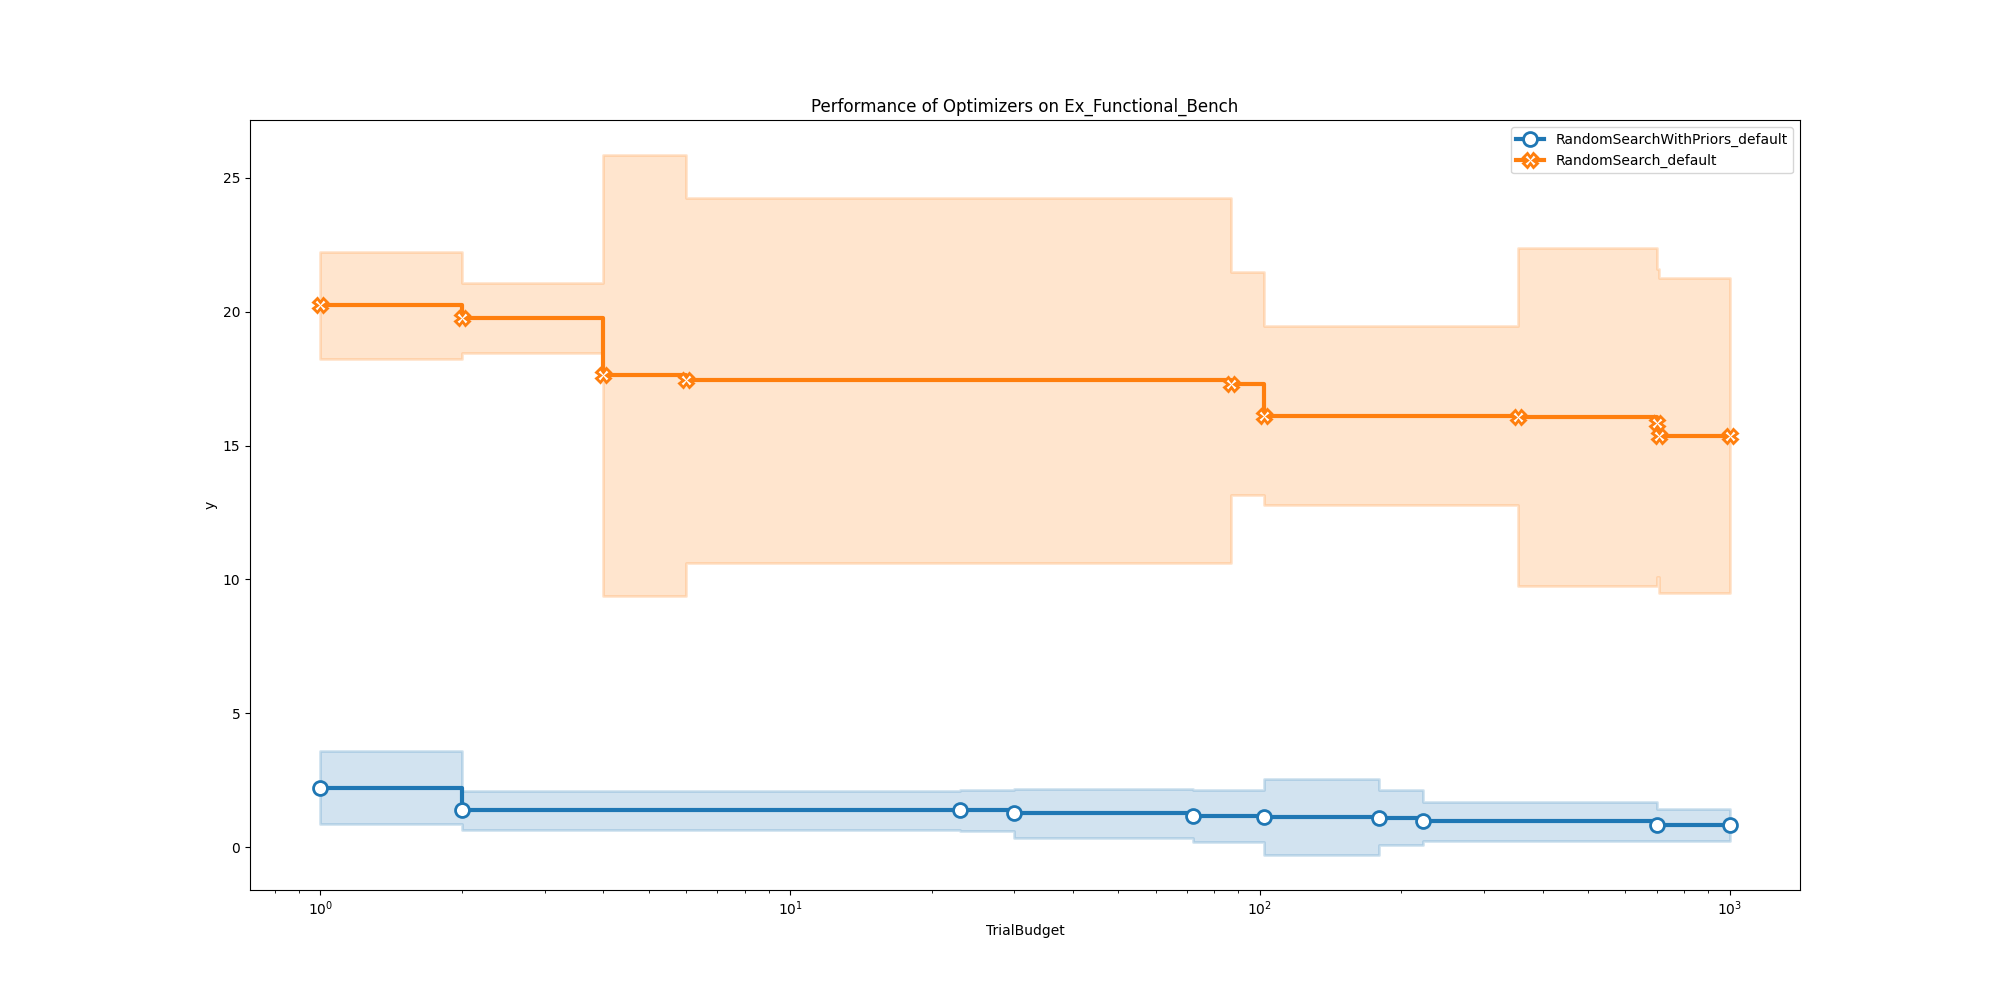

In [34]:
from IPython.display import Image

Image(filename="./example-outputs/hposuite_rs_comp/plots/Ex_Functional_Bench_performance.png")